In [24]:
# source activate python2
# sshfs ascott47@jhu.edu@gajteway2.marcc.jhu.edu:/scratch/groups/bzaitch1/badr/wrf/WRFV3/run/ mountpoint/
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import glob
#### 
#### /scratch/groups/bzaitch1/badr/wrf/WRFV3/run/wrfout*
# sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/badr/wrf/WRFV3/run/ mountpoint/

import scipy.stats
# define plots
def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [2]:
# 3KM RUNS 
# sshfs ascott47@jhu.edu@gateway2.marcc.jhu.edu:/scratch/groups/bzaitch1/shared/out/WRF/Baltimore/d02/


In [7]:
from netCDF4 import Dataset as nc

In [3]:
filepath = '/Users/ascott47/mountpoint/' #
files = glob.glob(filepath+ 'wrfout*')
from netCDF4 import Dataset as nc
f = nc('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')
#print f
for v in f.variables: 
    #print f.variables[v]
    try: 
        print(f.variables[v].name, f.variables[v].description)
    except AttributeError: 
        ''

(u'XLAT', u'LATITUDE, SOUTH IS NEGATIVE')
(u'XLONG', u'LONGITUDE, WEST IS NEGATIVE')
(u'LU_INDEX', u'LAND USE CATEGORY')
(u'ZNU', u'eta values on half (mass) levels')
(u'ZNW', u'eta values on full (w) levels')
(u'ZS', u'DEPTHS OF CENTERS OF SOIL LAYERS')
(u'DZS', u'THICKNESSES OF SOIL LAYERS')
(u'VAR_SSO', u'variance of subgrid-scale orography')
(u'U', u'x-wind component')
(u'V', u'y-wind component')
(u'W', u'z-wind component')
(u'PH', u'perturbation geopotential')
(u'PHB', u'base-state geopotential')
(u'T', u'perturbation potential temperature (theta-t0)')
(u'HFX_FORCE', u'SCM ideal surface sensible heat flux')
(u'LH_FORCE', u'SCM ideal surface latent heat flux')
(u'TSK_FORCE', u'SCM ideal surface skin temperature')
(u'HFX_FORCE_TEND', u'SCM ideal surface sensible heat flux tendency')
(u'LH_FORCE_TEND', u'SCM ideal surface latent heat flux tendency')
(u'TSK_FORCE_TEND', u'SCM ideal surface skin temperature tendency')
(u'MU', u'perturbation dry air mass in column')
(u'MUB', u'base stat

In [4]:
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points.index = ['urban', 'rural']
analysis_points



/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


,location:Longitude,location:Latitude
urban,-76.611088,39.281527
rural,-76.706294,39.479408


In [13]:
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

t2 = getvar(ncfile, "T2")
df = t2.to_dataframe()

tree = scipy.spatial.KDTree(df[['XLONG', 'XLAT']].values, leafsize = 100)

# urban 
results = tree.query(analysis_points.loc['urban'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
urban_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

# rural
results = tree.query(analysis_points.loc['rural'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
rural_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

In [14]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
urban_temps = np.ones(len(files))
rural_temps = np.ones(len(files))

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = nc(file, 'r')
    urban_temps[i] = ncfile.variables['T2'][:,urban_location[1],urban_location[0]]
    rural_temps[i] = ncfile.variables['T2'][:,rural_location[1],rural_location[0]]

    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

769.750477076


/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/matplotlib/artist.py:233: MatplotlibDeprecationWarning: get_axes has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  stacklevel=1)


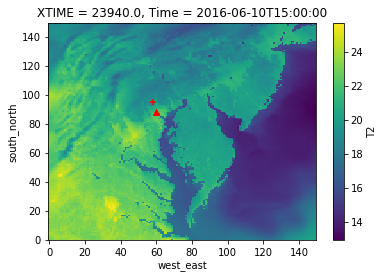

In [15]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

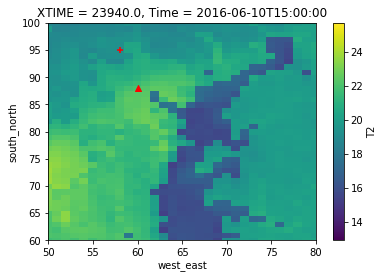

In [19]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.set_xlim([50,80])
ax.set_ylim([60,100])
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

In [17]:
temp = pd.DataFrame([], index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
temp['urban_wrf'] = urban_temps -273.15
temp['rural_wrf'] = rural_temps -273.15
temp['urban_obs'] = tempDF[urban]
temp['rural_obs'] = tempDF[rural]

temp['deltat_wrf'] = temp['urban_wrf'] - temp['rural_wrf']
temp['deltat_obs'] = temp['urban_obs'] - temp['rural_obs']
#temp.to_csv('wrfanalysis.csv')
temp.head()

,urban_wrf,rural_wrf,urban_obs,rural_obs,deltat_wrf,deltat_obs
2016-05-25 00:00:00,20.694879,20.124200,NaN,NaN,0.570679,NaN
2016-05-25 01:00:00,19.306909,18.786371,NaN,NaN,0.520538,NaN
2016-05-25 02:00:00,18.349512,17.805353,NaN,NaN,0.544159,NaN
2016-05-25 03:00:00,17.304529,17.236353,NaN,NaN,0.068176,NaN
2016-05-25 04:00:00,16.493097,16.478448,NaN,NaN,0.014648,NaN


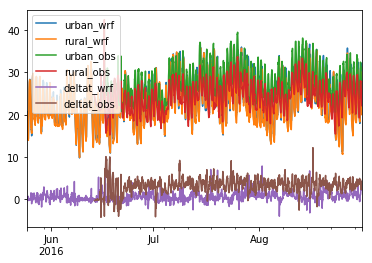

In [20]:
temp.plot()

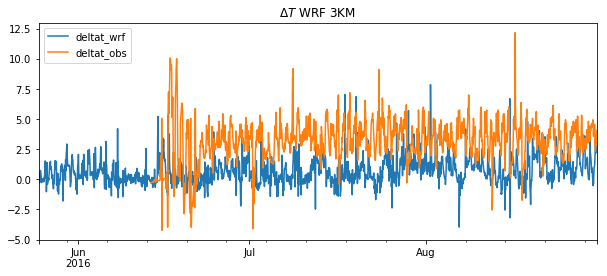

In [35]:
temp[['deltat_wrf', 'deltat_obs']].plot(figsize = [10,4], title = '$\Delta T$ WRF 3KM')
plt.ylabel = ('$^\circ C$')

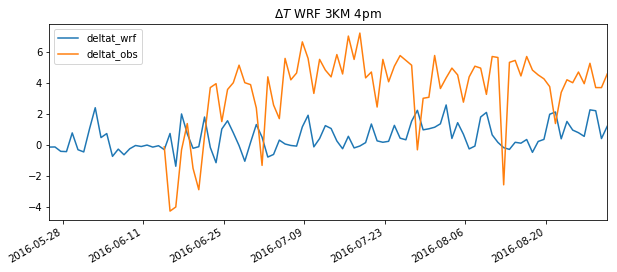

In [39]:
temp[['deltat_wrf', 'deltat_obs']][temp.index.hour==16].plot(figsize = [10,4], title = '$\Delta T$ WRF 3KM 4pm')
plt.ylabel = ('$^\circ C$')

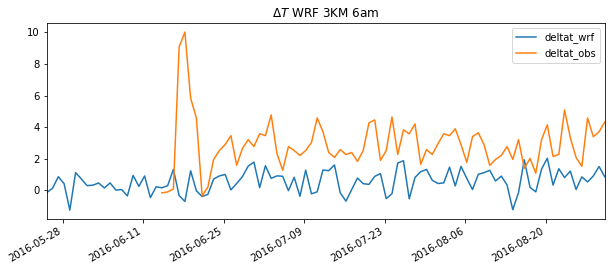

In [37]:
temp[['deltat_wrf', 'deltat_obs']][temp.index.hour==6].plot(figsize = [10,4], title = '$\Delta T$ WRF 3KM 6am')
plt.ylabel = ('$^\circ C$')

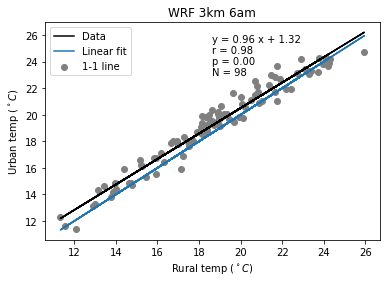

In [30]:
easy_scatter(temp['rural_wrf'][temp.index.hour==6], temp['urban_wrf'][temp.index.hour==6], 'WRF 3km 6am', 'Rural temp ($^\circ C$)', 'Urban temp ($^\circ C$)')
plt.plot(temp['rural_wrf'][temp.index.hour==6],temp['rural_wrf'][temp.index.hour==6])
plt.legend(['Data', 'Linear fit', '1-1 line'])

(-0.034950282059890342, -0.14944574283208209, 0.14190957630591955)

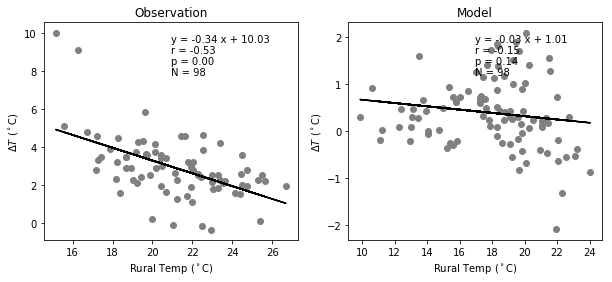

In [29]:
fig = plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
easy_scatter(temp[temp.index.hour==6]['rural_obs'], 
            temp[temp.index.hour==6]['deltat_obs'], 
             'Observation', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')
plt.subplot(1,2,2)
easy_scatter(temp[temp.index.hour==10]['rural_wrf'], 
            temp[temp.index.hour==10]['deltat_wrf'],
             'Model', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')

In [3]:
# define plots
def easy_scatter(x,y,title='', xlabel='', ylabel='') : 
# plots x,y (need to be np array) and calculates and prints their best fit line
    ind = ~np.isnan(y) & ~np.isnan(x) # subset values that aren't NaNs
    m,b = np.polyfit(x[ind],y[ind],1)
    r, p = scipy.stats.pearsonr(x[ind], y[ind]) #np.corrcoef(x[ind],y[ind])[0,1]
    plt.scatter(x,y, color = 'grey')
    plt.plot(x, m*x+b, color = 'black')
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    # annotate the linear reqression, y = mx+b
    plt.annotate('y = %.2f x + %.2f'%(m,b), xy=(.5, .9), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('r = %.2f'%(r), xy=(.5, .85), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('p = %.2f'%(p), xy=(.5, .8), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    plt.annotate('N = %i'%(ind.shape), xy=(.5, .75), xycoords='axes fraction',  horizontalalignment='left', verticalalignment='bottom')
    return m, r, p

In [3]:
filepath = '/Users/ascott47/mountpoint/' #
files = glob.glob(filepath+ 'wrfout*')

In [423]:
from netCDF4 import Dataset as nc
f = nc('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')
#print f
for v in f.variables: 
    #print f.variables[v]
    try: 
        print(f.variables[v].name, f.variables[v].description)
    except AttributeError: 
        ''

(u'XLAT', u'LATITUDE, SOUTH IS NEGATIVE')
(u'XLONG', u'LONGITUDE, WEST IS NEGATIVE')
(u'LU_INDEX', u'LAND USE CATEGORY')
(u'ZNU', u'eta values on half (mass) levels')
(u'ZNW', u'eta values on full (w) levels')
(u'ZS', u'DEPTHS OF CENTERS OF SOIL LAYERS')
(u'DZS', u'THICKNESSES OF SOIL LAYERS')
(u'VAR_SSO', u'variance of subgrid-scale orography')
(u'U', u'x-wind component')
(u'V', u'y-wind component')
(u'W', u'z-wind component')
(u'PH', u'perturbation geopotential')
(u'PHB', u'base-state geopotential')
(u'T', u'perturbation potential temperature (theta-t0)')
(u'HFX_FORCE', u'SCM ideal surface sensible heat flux')
(u'LH_FORCE', u'SCM ideal surface latent heat flux')
(u'TSK_FORCE', u'SCM ideal surface skin temperature')
(u'HFX_FORCE_TEND', u'SCM ideal surface sensible heat flux tendency')
(u'LH_FORCE_TEND', u'SCM ideal surface latent heat flux tendency')
(u'TSK_FORCE_TEND', u'SCM ideal surface skin temperature tendency')
(u'MU', u'perturbation dry air mass in column')
(u'MUB', u'base stat

In [208]:
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


In [214]:
analysis_points = meta.loc[[urban,rural]][['location:Longitude', 'location:Latitude']]
analysis_points.index = ['urban', 'rural']
analysis_points

,location:Longitude,location:Latitude
urban,-76.611088,39.281527
rural,-76.706294,39.479408


In [347]:
# import the dataset and query a point
import scipy.spatial
from netCDF4 import Dataset
from wrf import getvar
ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

t2 = getvar(ncfile, "T2")
df = t2.to_dataframe()

tree = KDTree(df[['XLONG', 'XLAT']].values, leafsize = 100)

# urban 
results = tree.query(analysis_points.loc['urban'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
urban_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

# rural
results = tree.query(analysis_points.loc['rural'].values, k = 5, distance_upper_bound=1) # lookup closest points; returns first row as distance and second row as index
rural_location = df.iloc[results[1][0]].name # get the 'name', or coordinate location, of the points

In [353]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
urban_temps = np.ones(len(files))
rural_temps = np.ones(len(files))

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    urban_temps[i] = ncfile.variables['T2'][:,urban_location[1],urban_location[0]]
    rural_temps[i] = ncfile.variables['T2'][:,rural_location[1],rural_location[0]]

    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

786.853110075


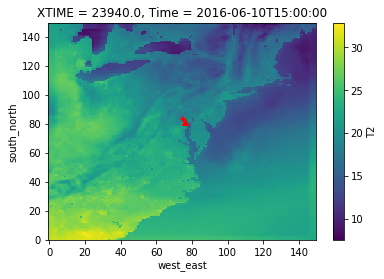

In [465]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

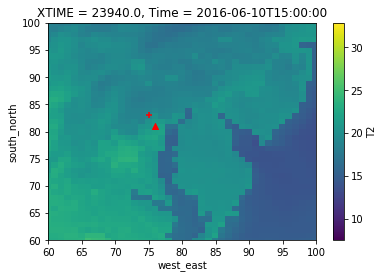

In [354]:
fig  = (t2-273.15).plot()
ax = fig.get_axes()
ax.set_xlim([60,100])
ax.set_ylim([60,100])
ax.scatter(urban_location[1], urban_location[0],  marker = '^', color = 'r')
ax.scatter(rural_location[1],rural_location[0], marker = '+', color = 'r')

In [424]:
variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']

In [461]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
urban_df = np.ones([len(files), len(variables)])
rural_df = np.ones([len(files), len(variables)])

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
    urban_df[i,:] = [ncfile.variables[x][:,urban_location[1],urban_location[0]] for x in variables]
    rural_df[i,:] = [ncfile.variables[x][:,rural_location[1],rural_location[0]] for x in variables]
    
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

urbanDF = pd.DataFrame(urban_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
ruralDF = pd.DataFrame(rural_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))

urbanDF.to_csv('urban_wrfanalysis.csv')
ruralDF.to_csv('rural_wrfanalysis.csv')

1206.6509099


In [463]:
urbanDF.to_csv('urban_wrfanalysis.csv')
ruralDF.to_csv('rural_wrfanalysis.csv')

In [464]:
1206/60.

20.1

In [355]:
temp = pd.DataFrame([], index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
temp['urban_wrf'] = urban_temps -273.15
temp['rural_wrf'] = rural_temps -273.15
temp['urban_obs'] = tempDF[urban]
temp['rural_obs'] = tempDF[rural]

temp['deltat_wrf'] = temp['urban_wrf'] - temp['rural_wrf']
temp['deltat_obs'] = temp['urban_obs'] - temp['rural_obs']
#temp.to_csv('wrfanalysis.csv')
temp.head()

,urban_wrf,rural_wrf,urban_obs,rural_obs,deltat_wrf,deltat_obs
2016-05-25 00:00:00,20.764642,20.590112,NaN,NaN,0.174530,NaN
2016-05-25 01:00:00,20.137781,19.821558,NaN,NaN,0.316223,NaN
2016-05-25 02:00:00,18.852289,18.455804,NaN,NaN,0.396484,NaN
2016-05-25 03:00:00,17.494318,17.290521,NaN,NaN,0.203796,NaN
2016-05-25 04:00:00,16.290857,16.370172,NaN,NaN,-0.079315,NaN


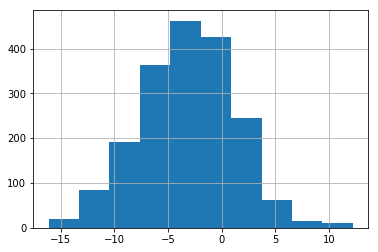

In [357]:
(temp['urban_wrf']-temp['urban_obs']).hist()

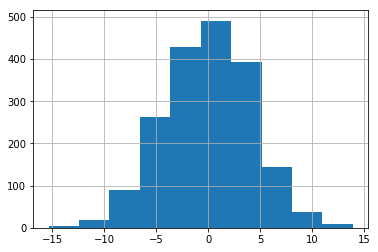

In [358]:
(temp['rural_wrf']-temp['rural_obs']).hist()

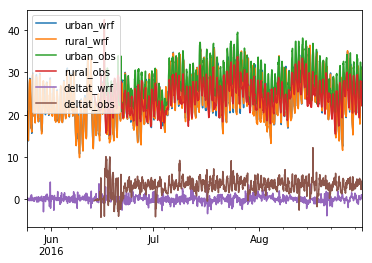

In [359]:
temp.plot()

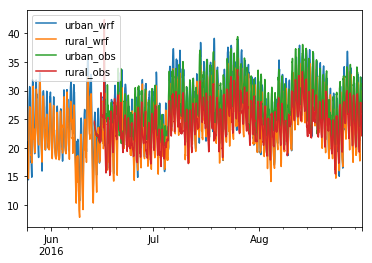

In [289]:
temp.plot()

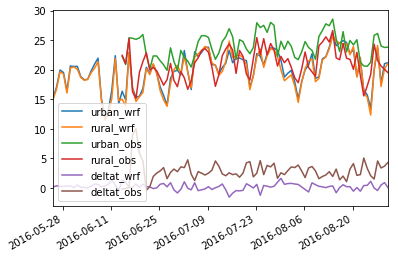

In [360]:
temp[temp.index.hour==6].plot()

(-0.059229170562233244, -0.36646004719519876, 0.00020628092138643171)

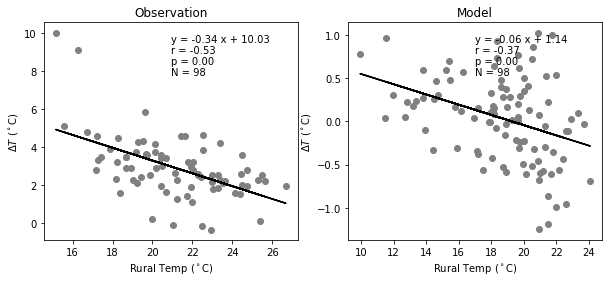

In [497]:
fig = plt.figure(figsize = [10,4])
plt.subplot(1,2,1)
easy_scatter(temp[temp.index.hour==6]['rural_obs'], 
            temp[temp.index.hour==6]['deltat_obs'], 
             'Observation', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')
plt.subplot(1,2,2)
easy_scatter(temp[temp.index.hour==10]['rural_wrf'], 
            temp[temp.index.hour==10]['deltat_wrf'],
             'Model', 'Rural Temp ($^\circ $C)', '$\Delta T$ ($^\circ $C)')

Now diagnose why using energy budget variables :
    need R_net, net_lw, sensible heat, latent heat, ground flux
    
    'GRDFLX'  # ground flux
    'LH', latent heat flux

In [ ]:
import time
files = list(np.sort(glob.glob('/Users/ascott47/mountpoint/wrfout_*')))
variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
urban_df = np.ones([len(files), len(variables)])
rural_df = np.ones([len(files), len(variables)])

times = []
i = 0
toc = time.time()
for file in files: 
    ncfile = Dataset(file, 'r')
    variables = ['T2', 'SWDNB', 'SWUPB', 'LWDNB', 'LWUPB', 'LH', 'HFX', 'GRDFLX']
    urban_df[i,:] = [ncfile.variables[x][:,urban_location[1],urban_location[0]] for x in variables]
    rural_df[i,:] = [ncfile.variables[x][:,rural_location[1],rural_location[0]] for x in variables]
    
    times.append(file[-19:])
    ncfile.close()
    i = i+1
print time.time() -toc

urbanDF = pd.DataFrame(urban_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))
ruralDF = pd.DataFrame(rural_df, columns=variables, 
             index = pd.to_datetime(times, format = '%Y-%m-%d_%H:%M:%S'))

urbanDF.to_csv('urban_wrfanalysis.csv')
ruralDF.to_csv('rural_wrfanalysis.csv')

In [472]:
# compute  net_lw
# compute R_net 
for df in [urbanDF, ruralDF] : 
    df['net_lw'] = df['LWDNB'] - df['LWUPB']
    df['r_net'] = df['net_lw'] + df['SWDNB'] - df['SWUPB']

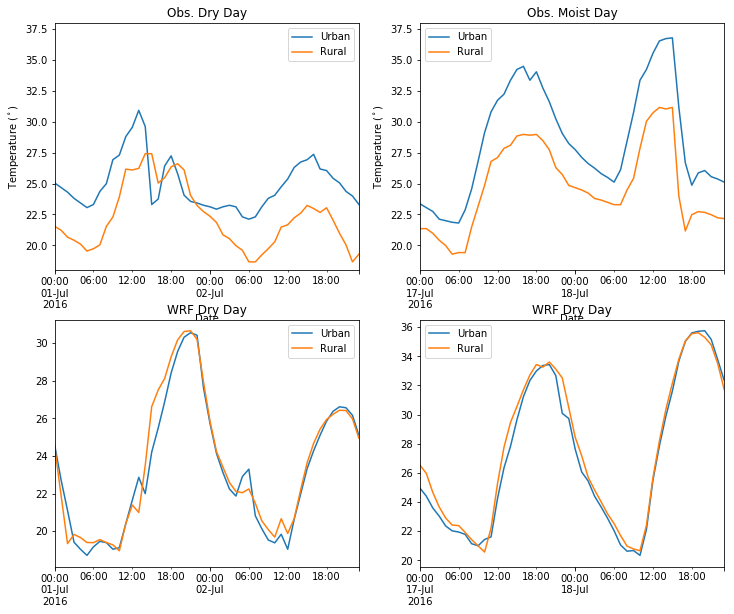

In [489]:
plt.figure(figsize=[12,10])
# plot temperature 
ax = plt.subplot(221)
tempDF[[urban, rural]]['2016-07-01':'2016-07-02'].plot(ax = ax)
plt.legend(['Urban', 'Rural'])
plt.title('Obs. Dry Day')
plt.ylim([18,38])
plt.ylabel('Temperature ($^\circ$)')

ax2 = plt.subplot(222)
tempDF[[urban, rural]]['2016-07-17':'2016-07-18'].plot(ax = ax2)
plt.legend(['Urban', 'Rural'])
plt.title('Obs. Moist Day')
plt.ylim([18,38])
plt.ylabel('Temperature ($^\circ$)')

ax3 = plt.subplot(2,2,3)
(urbanDF['2016-07-01':'2016-07-02']['T2']-273.15).plot(ax = ax3, label = 'Urban')
(ruralDF['2016-07-01':'2016-07-02']['T2']-273.15).plot(ax = ax3, label = 'Rural')
ax3.set_title('WRF Dry Day')
plt.legend()

ax4 = plt.subplot(2,2,4)
(urbanDF['2016-07-17':'2016-07-18']['T2']-273.15).plot(ax = ax4, label = 'Urban')
(ruralDF['2016-07-17':'2016-07-18']['T2']-273.15).plot(ax = ax4, label = 'Rural')
ax4.set_title('WRF Dry Day')
plt.legend()

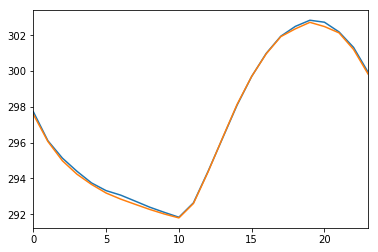

In [496]:
urbanDF['T2'].groupby(urbanDF.index.hour).mean().plot()
ruralDF['T2'].groupby(urbanDF.index.hour).mean().plot()

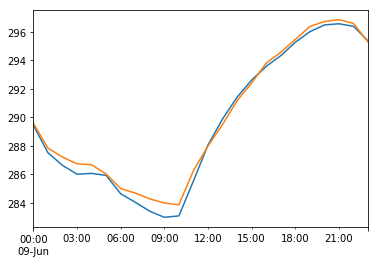

In [494]:
ruralDF['2016-06-09']['T2'].plot()
urbanDF['2016-06-09']['T2'].plot()

In [490]:
ruralDF['T2'].argmin()

Timestamp('2016-06-09 09:00:00')

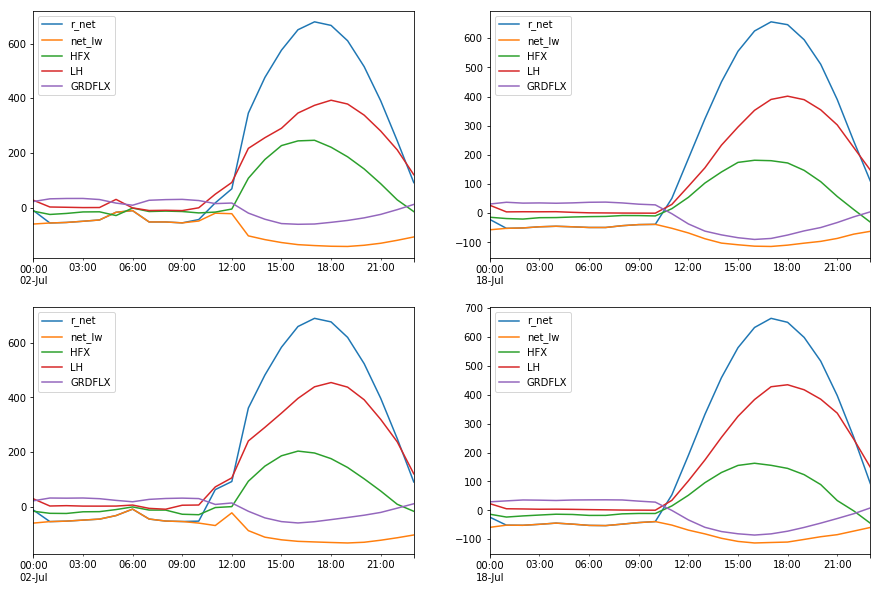

In [480]:
# plot energy balance 
vars = ['r_net', 'net_lw', 'HFX', 'LH', 'GRDFLX']

fig = plt.figure(figsize = [15,10])
# plot Urban, dry day 
day = '2016-07-02'
ax = plt.subplot(2,2,1)
urbanDF[day][vars].plot(ax = ax)

# plot urban, wet 
day = '2016-07-18'
ax2 = plt.subplot(2,2,2)
urbanDF[day][vars].plot(ax = ax2)

# plot rural, dry day
day = '2016-07-02'
ax3 = plt.subplot(2,2,3)
ruralDF[day][vars].plot(ax = ax3)

# plot rural, wet day 
day = '2016-07-18'
ax4 = plt.subplot(2,2,4)
ruralDF[day][vars].plot(ax = ax4)


# Conclusions 

Wrf reasonably reproduces the temperatures observed during July 2016. We see the desired effect of urban-rural temperature differences decreasing with higher rural temperatures. However, WRF at this resolution underestimates urban temperatures, and does not reproduce the phenomena of higher nighttime urban temperatures during moist weather types.

Additionally, the timing of temperature is unexpected- WRF shows minimum daily temperature occuring at 10am rather than 6am as is observed. 

In [368]:
ds = xr.open_dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

In [135]:
ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')
ncfile.variables['T2']

<type 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 150, 150)
filling on, default _FillValue of 9.96920996839e+36 used

In [136]:
ncfile.variables['T2'].shape

(1, 150, 150)

In [138]:
lats = ncfile.variables['XLAT']

In [152]:
ncfile.variables['T2'][]

<type 'netCDF4._netCDF4.Variable'>
float32 T2(Time, south_north, west_east)
    FieldType: 104
    MemoryOrder: XY 
    description: TEMP at 2 M
    units: K
    stagger: 
    coordinates: XLONG XLAT XTIME
unlimited dimensions: Time
current shape = (1, 150, 150)
filling on, default _FillValue of 9.96920996839e+36 used

In [77]:
lats = t2.coords['XLAT']
lons = t2.coords['XLONG']
arrays = [lats,lons]
tuples = list(zip(*arrays))

In [86]:
t2.coords['XLAT'].shape

(150, 150)

In [81]:
index = pd.MultiIndex.from_tuples(tuples, names = ['lat', 'lon'])
pd.DataFrame(t2.values, index = index)

,,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
lat,lon,,,,,,,,,,,,,,,,,,,,,
32.288532,-83.914856,303.862976,303.790161,303.871948,304.044037,304.139160,304.061737,303.965363,303.675262,303.730530,303.922729,...,296.370728,296.315186,296.246643,296.187225,296.137848,296.099030,296.073242,296.054382,296.029785,296.001801
32.296291,-83.818634,303.630737,303.457520,303.539886,303.645966,303.814301,303.646240,303.690155,303.765228,303.660278,303.866882,...,296.366333,296.309204,296.252716,296.203766,296.164337,296.128143,296.099792,296.071716,296.046448,296.016083
32.303955,-83.722382,303.426178,303.414948,303.593628,303.659302,303.725494,303.395569,303.423645,303.549835,303.550079,303.714600,...,296.275909,296.231110,296.189453,296.154816,296.127747,296.103058,296.098419,296.086914,296.064850,296.034882
32.311523,-83.626129,303.289673,303.220947,303.543976,303.743744,303.724213,303.273590,303.205719,303.306030,303.415375,303.455261,...,295.849884,295.829865,295.802429,295.800049,295.797668,295.726440,295.993988,296.091187,296.086395,296.060791
32.318993,-83.529846,303.185303,303.171783,303.342194,303.897400,303.334808,302.972778,302.805603,302.664398,302.910919,303.198486,...,294.916901,294.964966,294.947083,295.016693,295.035400,295.037170,295.813751,296.088898,296.101166,296.082489
32.326363,-83.433533,303.132446,302.865692,303.180328,303.254150,303.099121,302.530396,302.422119,302.675446,302.802032,303.398041,...,295.230682,295.248535,295.218506,295.250153,295.220062,295.133331,295.790802,296.090210,296.117615,296.110840
32.333637,-83.337219,303.087250,303.109741,302.964600,303.767883,302.885254,302.665863,302.504211,302.802155,302.949188,302.601196,...,295.194794,295.047699,295.014191,295.082703,295.017487,294.985291,295.728943,296.088837,296.136658,296.146118
32.340801,-83.240875,302.935669,302.990295,302.885925,303.763702,304.220306,302.125183,302.276367,302.200592,302.018768,302.663116,...,295.280792,295.268768,295.254700,295.262360,295.069336,294.995514,295.704071,296.094421,296.157227,296.184174
32.347874,-83.144501,302.570862,302.649963,302.803406,302.807495,302.838989,302.693451,302.666626,301.720459,302.034668,302.480377,...,295.273041,295.232452,295.244141,295.224640,295.165771,294.963989,295.691803,296.101074,296.174683,296.213226


In [2]:
ds = xr.open_dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

In [3]:
ds

<xarray.Dataset>
Dimensions:                (Time: 1, bottom_top: 112, bottom_top_stag: 113, soil_layers_stag: 4, south_north: 150, south_north_stag: 151, west_east: 150, west_east_stag: 151)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 32.2885 ...
    XLONG                  (Time, south_north, west_east) float32 -83.9149 ...
    XTIME                  (Time) datetime64[ns] 2016-06-10T15:00:00
    XLAT_U                 (Time, south_north, west_east_stag) float32 32.2846 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 -83.963 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 32.2479 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 -83.9102 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 '2016-06-10_15:00:00'
    LU_INDEX     

In [39]:
ds['T2'].to_dataframe()

XLAT      XLONG               XTIME  \
Time south_north west_east                                             
0    0           0          32.288532 -83.914856 2016-06-10 15:00:00   
                 1          32.296291 -83.818634 2016-06-10 15:00:00   
                 2          32.303955 -83.722382 2016-06-10 15:00:00   
                 3          32.311523 -83.626129 2016-06-10 15:00:00   
                 4          32.318993 -83.529846 2016-06-10 15:00:00   
                 5          32.326363 -83.433533 2016-06-10 15:00:00   
                 6          32.333637 -83.337219 2016-06-10 15:00:00   
                 7          32.340801 -83.240875 2016-06-10 15:00:00   
                 8          32.347874 -83.144501 2016-06-10 15:00:00   
                 9          32.354858 -83.048126 2016-06-10 15:00:00   
                 10         32.361744 -82.951721 2016-06-10 15:00:00   
                 11         32.368519 -82.855286 2016-06-10 15:00:00   
                 12         32.375214 -82.758850 2016-06-10 15:00:00   
                 13         32.381798 -82.662384 2016-06-10 15:00:00   
                 14         32.388287 -82.565887 2016-06-10 15:00:00   
                 15         32.394680 -82.469391 2016-06-10 15:00:00   
                 16         32.400978 -82.372864 2016-06-10 15:00:00   
                 17         32.407173 -82.276337 2016-06-10 15:00:00   
                 18         32.413265 -82.179779 2016-06-10 15:00:00   
                 19         32.419262 -82.083221 2016-06-10 15:00:00   
                 20         32.425163 -81.986633 2016-06-10 15:00:00   
                 21         32.430969 -81.890015 2016-06-10 15:00:00   
                 22         32.436672 -81.793396 2016-06-10 15:00:00   
                 23         32.442280 -81.696777 2016-06-10 15:00:00   
                 24         32.447792 -81.600098 2016-06-10 15:00:00   
                 25         32.453194 -81.503448 2016-06-10 15:00:00   
                 26         32.458508 -81.406738 2016-06-10 15:00:00   
                 27         32.463711 -81.310059 2016-06-10 15:00:00   
                 28         32.468826 -81.213348 2016-06-10 15:00:00   
                 29         32.473843 -81.116608 2016-06-10 15:00:00   
...                               ...        ...                 ...   
     149         120        44.876919 -71.419006 2016-06-10 15:00:00   
                 121        44.871799 -71.300964 2016-06-10 15:00:00   
                 122        44.866558 -71.182922 2016-06-10 15:00:00   
                 123        44.861195 -71.064880 2016-06-10 15:00:00   
                 124        44.855705 -70.946899 2016-06-10 15:00:00   
                 125        44.850101 -70.828918 2016-06-10 15:00:00   
                 126        44.844364 -70.710968 2016-06-10 15:00:00   
                 127        44.838516 -70.593018 2016-06-10 15:00:00   
                 128        44.832535 -70.475128 2016-06-10 15:00:00   
                 129        44.826431 -70.357239 2016-06-10 15:00:00   
                 130        44.820210 -70.239410 2016-06-10 15:00:00   
                 131        44.813858 -70.121582 2016-06-10 15:00:00   
                 132        44.807392 -70.003784 2016-06-10 15:00:00   
                 133        44.800797 -69.885986 2016-06-10 15:00:00   
                 134        44.794079 -69.768250 2016-06-10 15:00:00   
                 135        44.787239 -69.650543 2016-06-10 15:00:00   
                 136        44.780281 -69.532837 2016-06-10 15:00:00   
                 137        44.773190 -69.415192 2016-06-10 15:00:00   
                 138        44.765984 -69.297577 2016-06-10 15:00:00   
                 139        44.758652 -69.179962 2016-06-10 15:00:00   
                 140        44.751205 -69.062408 2016-06-10 15:00:00   
                 141        44.743629 -68.944855 2016-06-10 15:00:00   
                 142        44.735931 -68.827362 2016-06-10 15:00:00   
 

In [34]:
ds.T2.loc[dict(south_north = 32.2885)]

AssertionError: (2, 3)

In [29]:
ds.T2.loc[dict(XLAT = 32.2885, XLONG = -83.9149)]
#ds.T2.loc[dict(XLAT = 39.281527, XLONG = -76.611088)]

ValueError: dimensions or multi-index levels ['XLONG', 'XLAT'] do not exist

In [203]:
# read in temp data 
filepath = '../cityheat/Bmore/2016/'

meta = pd.DataFrame(pd.read_csv(filepath + 'data/CleanedMeta2016.csv', sep = ','))
meta = meta.set_index('sensornumber', drop = False)
meta = meta.set_index(meta.index.astype('float64'), drop = False)
#mean_temp = pd.read_csv('meantemp.csv', header=-1).rename(columns = {0: 'SensorNumber', 1:'MeanTemp'}).set_index('SensorNumber')
tempDF = pd.read_csv(filepath + 'data/CleanedTemp2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')#.first()
tempDF.columns = tempDF.columns.astype('int')

rhDF = pd.read_csv(filepath + 'data/CleanedRH2016.csv', parse_dates = [0]).set_index('Date').resample('H', how = 'first')
rhDF.columns = rhDF.columns.astype('int')

urban = 97 # science center
rural = 68 # darryn's house

/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()
/Users/ascott47/anaconda/envs/python2/lib/python2.7/site-packages/ipykernel/__main__.py:11: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).first()


In [204]:
meta.loc[[urban,rural]][['location:Latitude', 'location:Longitude']]

,location:Latitude,location:Longitude
sensornumber,,
97,39.281527,-76.611088
68,39.479408,-76.706294


In [5]:
from netCDF4 import Dataset
from wrf import getvar

ncfile = Dataset('/Users/ascott47/mountpoint/wrfout_d01_2016-06-10_15:00:00')

# Get the Sea Level Pressure
slp = getvar(ncfile, "T2")


ImportError: dlopen(/Users/ascott47/anaconda/lib/python3.6/site-packages/netCDF4/_netCDF4.cpython-36m-darwin.so, 2): Library not loaded: @rpath/libmfhdf.0.dylib
  Referenced from: /Users/ascott47/anaconda/lib/libnetcdf.11.dylib
  Reason: image not found